In [1]:
%matplotlib inline
from kid_readout.measurement.io import npy
from kid_readout.roach import demodulator
from kid_readout.analysis.timeseries import binning

In [2]:
npd = npy.NumpyDirectory('/data/detectors/2016-11-18_181537_filterbank_bin/')

In [3]:
npd.node_names()

['StreamArray0',
 'ADCSnap1',
 'StreamArray2',
 'ADCSnap3',
 'StreamArray4',
 'ADCSnap5',
 'StreamArray6',
 'ADCSnap7',
 'StreamArray8',
 'ADCSnap9',
 'StreamArray10',
 'ADCSnap11',
 'StreamArray12',
 'ADCSnap13',
 'StreamArray14',
 'ADCSnap15',
 'StreamArray16',
 'ADCSnap17',
 'StreamArray18',
 'ADCSnap19',
 'StreamArray20',
 'ADCSnap21',
 'StreamArray22',
 'ADCSnap23',
 'StreamArray24',
 'ADCSnap25',
 'StreamArray26',
 'ADCSnap27',
 'StreamArray28',
 'ADCSnap29',
 'StreamArray30',
 'ADCSnap31',
 'StreamArray32',
 'ADCSnap33',
 'StreamArray34',
 'ADCSnap35',
 'StreamArray36',
 'ADCSnap37',
 'StreamArray38',
 'ADCSnap39',
 'StreamArray40',
 'ADCSnap41',
 'StreamArray42',
 'ADCSnap43',
 'StreamArray44',
 'ADCSnap45',
 'StreamArray46',
 'ADCSnap47',
 'StreamArray48',
 'ADCSnap49',
 'StreamArray50',
 'ADCSnap51',
 'StreamArray52',
 'ADCSnap53',
 'StreamArray54',
 'ADCSnap55',
 'StreamArray56',
 'ADCSnap57',
 'StreamArray58',
 'ADCSnap59',
 'StreamArray60',
 'ADCSnap61',
 'StreamArray62',


In [4]:
streams = [npd.read(name)[0] for name in npd.node_names() if name.startswith('StreamArray')]
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [5]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(1233.0, 1220.0),
 (1233.0, 1221.0),
 (1232.0, 1223.0),
 (1232.0, 1224.0),
 (1232.0, 1223.0),
 (1232.0, 1222.0),
 (1235.0, 1222.0),
 (1232.0, 1224.0),
 (1233.0, 1222.0),
 (1232.0, 1221.0),
 (1231.0, 1222.0),
 (1231.0, 1223.0),
 (1233.0, 1222.0),
 (1230.0, 1220.0),
 (1231.0, 1222.0),
 (1232.0, 1222.0),
 (1232.0, 1219.0),
 (1231.0, 1222.0),
 (1231.0, 1222.0),
 (1234.0, 1223.0),
 (1234.0, 1224.0),
 (1231.0, 1220.0),
 (1231.0, 1220.0),
 (1232.0, 1219.0),
 (1232.0, 1223.0),
 (1231.0, 1221.0),
 (1230.0, 1219.0),
 (1232.0, 1223.0),
 (1232.0, 1221.0),
 (1235.0, 1223.0),
 (1232.0, 1222.0),
 (1233.0, 1222.0),
 (1233.0, 1220.0),
 (1233.0, 1222.0),
 (1232.0, 1220.0),
 (1232.0, 1221.0),
 (1232.0, 1219.0),
 (1231.0, 1221.0),
 (1229.0, 1218.0),
 (1232.0, 1221.0),
 (1230.0, 1220.0),
 (1232.0, 1219.0),
 (1231.0, 1220.0),
 (1232.0, 1218.0),
 (1234.0, 1220.0),
 (1230.0, 1221.0),
 (1231.0, 1221.0),
 (1231.0, 1220.0),
 (1231.0, 1221.0),
 (1231.0, 1218.0),
 (1232.0, 1221.0),
 (1230.0, 1219.0),
 (1229.0, 12

In [6]:
streams[0].roach_state

StateDict({u'boffile': u'iq2xpfb14mcr11_2016_Jun_30_1301.bof', u'modulation_output': 0, u'modulation_rate': 0, u'fft_shift_register': 1048568, u'num_tone_samples': 131072, u'bank': 0, u'num_filterbank_channels': 16384, u'loopback': False, u'lo_frequency': 3000000000.0, u'adc_sample_rate': 512000000.0, u'waveform_normalization': 7.62939453125e-06, u'hardware_delay_samples': -16025.6, u'num_tones': 1, u'debug_register': 0, u'reference_sequence_number': -1, u'dac_attenuation': 0.0, u'heterodyne': True})

In [51]:
streams[0].sample_time.max()

0.13103999999999999

In [7]:
demod = demodulator.Demodulator(hardware_delay_samples=streams[0].roach_state.hardware_delay_samples)

def demodulate_data(sss):
    return demod.demodulate(data=sss.s21_raw,
                            tone_bin=sss.tone_bin,
                            tone_num_samples=sss.roach_state.num_tone_samples,
                            tone_phase=sss.tone_phase,
                            fft_bin=sss.filterbank_bin,
                            nchan=None,
                            seq_nos=None)

In [8]:
f_filterbank = streams[0].roach_state.adc_sample_rate / streams[0].roach_state.num_filterbank_channels
f_filterbank

31250.0

In [9]:
n_filterbank = streams[0].filterbank_bin
n_filterbank

3200

In [10]:
1e-6 * f_filterbank * n_filterbank

100.0

(-32768, 32768)

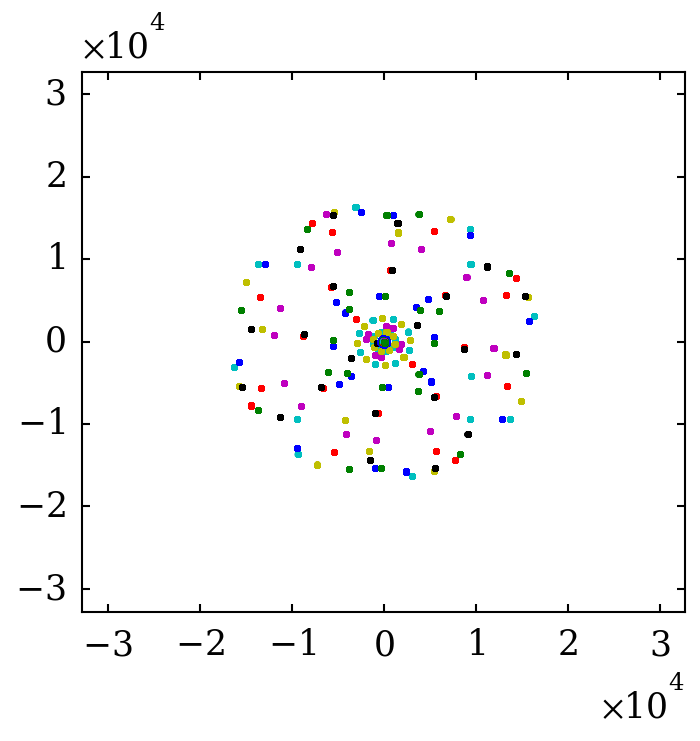

In [11]:
fig, ax = plt.subplots(figsize=(3, 3))
for stream in streams:
    ax.plot(stream.s21_raw.real, stream.s21_raw.imag, '.')
ax.set_xlim(-2**15, 2**15)
ax.set_ylim(-2**15, 2**15)
#ax.legend(loc='best', fontsize=3)

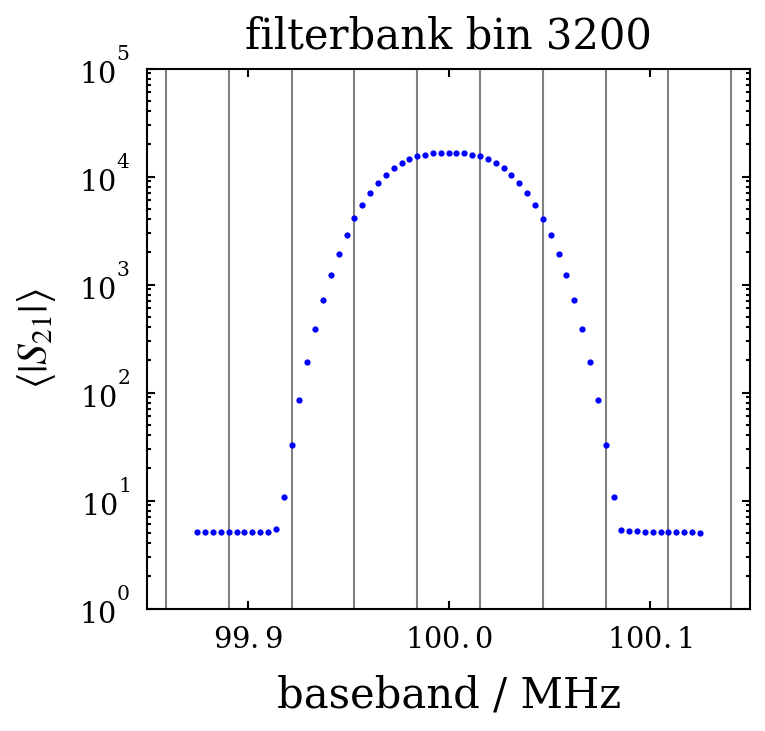

In [12]:
f_scale = 1e-6
filterbank_bin_edges = f_filterbank * np.arange(n_filterbank - 4.5, n_filterbank + 5.5)

fig, ax = plt.subplots(figsize=(3, 3))
ax.set_xlabel('baseband / MHz')
ax.set_ylabel(r'$\langle |S_{21}| \rangle$')
for edge in filterbank_bin_edges:
    ax.axvline(f_scale * edge, color='gray')
for stream in streams:
    ax.semilogy(f_scale * (stream.frequency - stream.roach_state.lo_frequency),
                np.mean(np.abs(stream.s21_raw)),
                '.b')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
#ax.set_xlim(99.85, 100.15)
ax.set_xticks([99.9, 100, 100.1])
ax.tick_params(labelsize='xx-small')
ax.set_title('filterbank bin {:.0f}'.format(stream.filterbank_bin))

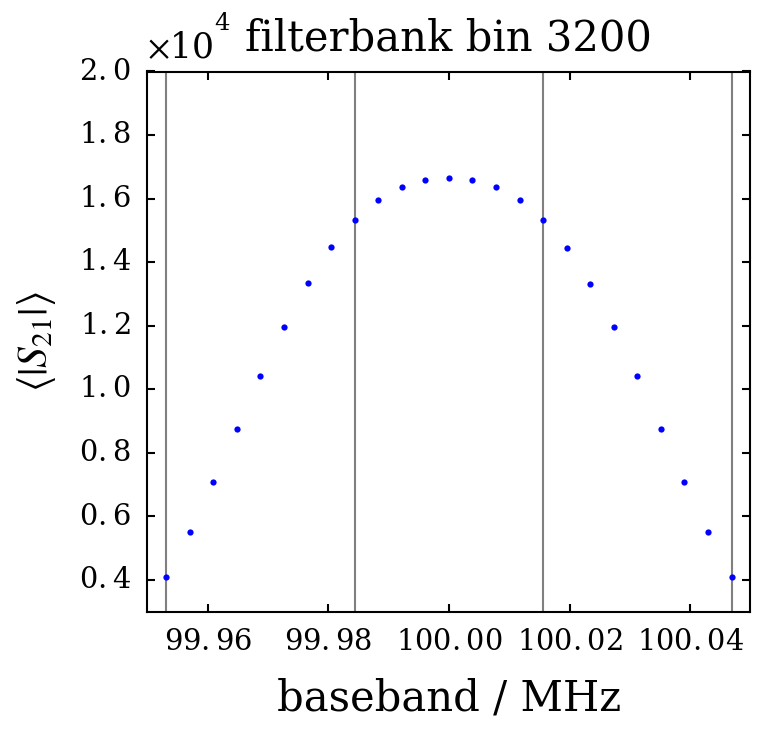

In [13]:
f_scale = 1e-6
filterbank_bin_edges = f_filterbank * np.arange(n_filterbank - 1.5, n_filterbank + 2.5)

fig, ax = plt.subplots(figsize=(3, 3))
ax.set_xlabel('baseband / MHz')
ax.set_ylabel(r'$\langle |S_{21}| \rangle$')
for edge in filterbank_bin_edges:
    ax.axvline(f_scale * edge, color='gray')
for stream in streams:
    ax.plot(f_scale * (stream.frequency - stream.roach_state.lo_frequency),
                np.mean(np.abs(stream.s21_raw)),
                '.b')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.set_xlim(99.95, 100.05)
ax.set_ylim(3e3, 2e4)
#ax.set_xticks([99.9, 100, 100.1])
ax.tick_params(labelsize='xx-small')
ax.set_title('filterbank bin {:.0f}'.format(stream.filterbank_bin))

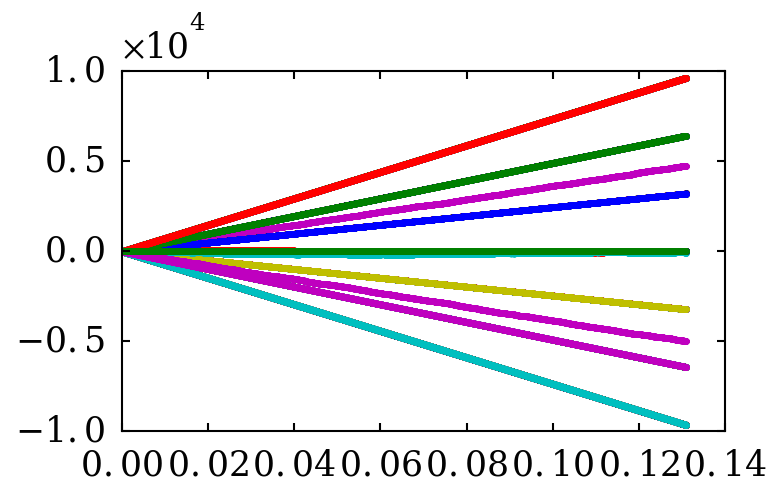

In [14]:
fig, ax = plt.subplots()
for stream in streams:
    ax.plot(stream.sample_time, np.unwrap(np.angle(stream.s21_raw)), '.')

# Center channel

In [15]:
sss = streams[len(streams) // 2]
sss.frequency

3100000000.0

In [16]:
sss.s21_raw.size

4096

In [17]:
s, f = plt.mlab.psd(sss.s21_raw, Fs=sss.stream_sample_rate, NFFT=sss.s21_raw.size, noverlap=0, window=plt.mlab.window_none,
                   sides='onesided')
edges, fb, sb = binning.log_bin_everywhere(f[1:-1], 10, s[1:-1])

(1e-05, 0.1)

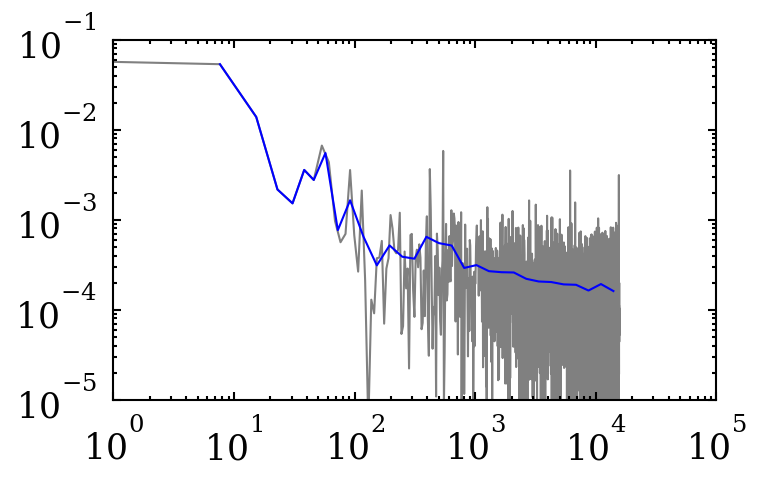

In [18]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(f, s, '-', color='gray')
ax.plot(fb, sb[0], '-', color='blue')
ax.plot()
ax.set_ylim(1e-5, 1e-1)

# Demodulated data

In [19]:
s21_demod = demodulate_data(sss)

In [20]:
sd, fd = plt.mlab.psd(s21_demod, Fs=sss.stream_sample_rate, NFFT=s21_demod.size, noverlap=0, window=plt.mlab.window_none,
                      sides='onesided')
edges, fdb, sdb = binning.log_bin_everywhere(fd[1:-1], 10, sd[1:-1])

(1e-05, 0.1)

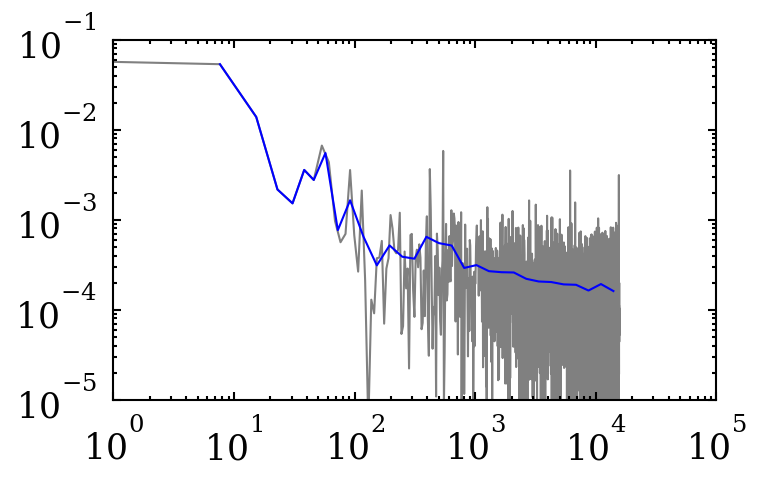

In [21]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(fd, sd, '-', color='gray')
ax.plot(fdb, sdb[0], '-', color='blue')
ax.plot()
ax.set_ylim(1e-5, 1e-1)

(1e-05, 0.1)

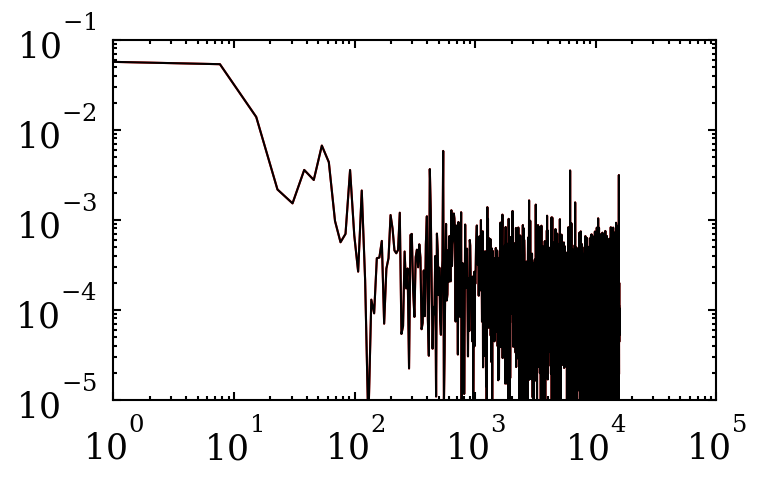

In [22]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(f, s, '-', color='red')
ax.plot(fd, sd, '-', color='black')
ax.plot()
ax.set_ylim(1e-5, 1e-1)

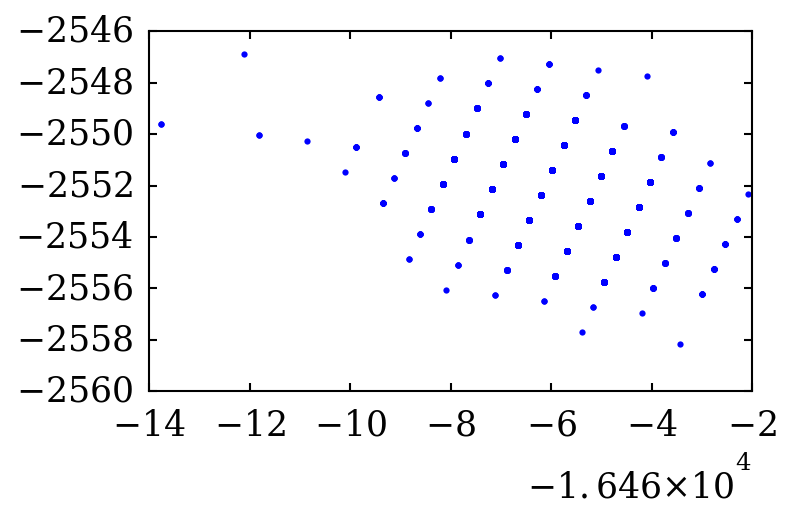

In [24]:
fig, ax = plt.subplots()
ax.plot(s21_demod.real, s21_demod.imag, '.b')

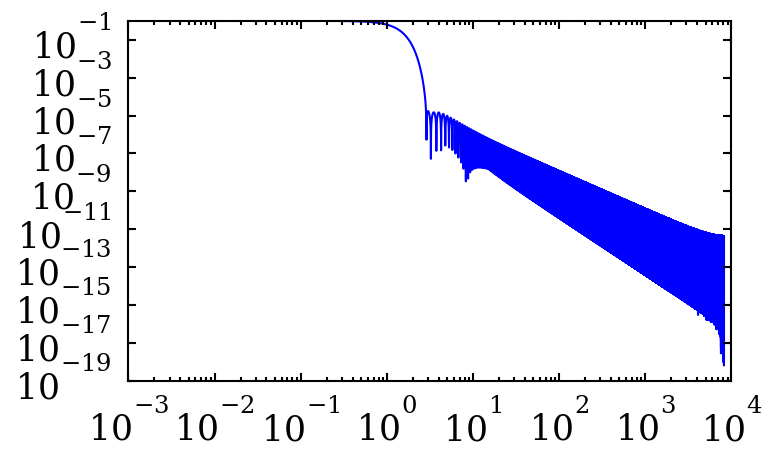

In [25]:
# What's going on here?
fig, ax = plt.subplots()
ax.loglog(demod._window_frequency, demod._window_response)

# PSDs on either side of the center channel

In [47]:
def analyze(sss):
    sss.s21_demod = demodulate_data(sss)
    sss.S_demod, sss.f_demod = plt.mlab.psd(sss.s21_demod, Fs=sss.stream_sample_rate,
                        NFFT=sss.s21_demod.size, noverlap=0, window=plt.mlab.window_hanning,
                   sides='onesided')
    edges, fd, sd = binning.log_bin_everywhere(sss.f_demod[1:-1], 10, sss.S_demod[1:-1])
    sss.f_demod_binned = fd
    sss.S_demod_binned = sd[0]

In [48]:
offsets = range(-4, 5)
mappable = plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=min(offsets), vmax=max(offsets)),
                                 cmap=plt.cm.plasma)

In [49]:
for offset in offsets:
    analyze(streams[len(streams) // 2 + offset])

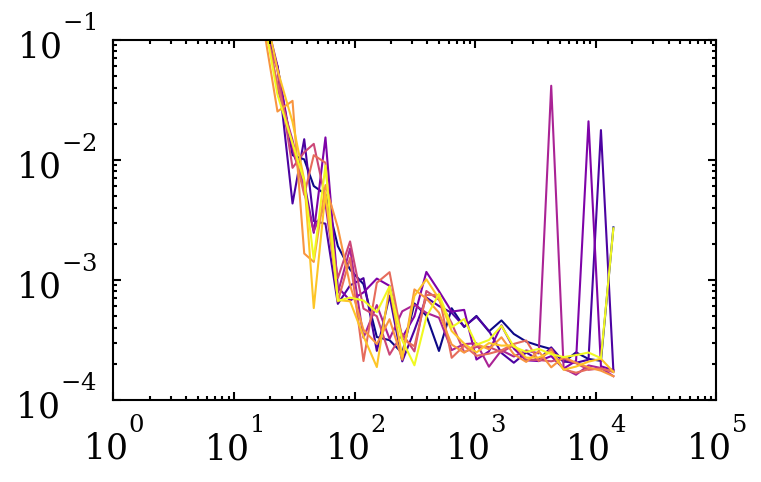

In [50]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
for offset in offsets:
    sss = streams[len(streams) // 2 + offset]
    ax.plot(sss.f_demod_binned, sss.S_demod_binned, label=str(offset),
            color=mappable.to_rgba(offset), alpha=1)
ax.set_ylim(1e-4, 1e-1);